In [11]:
from Parse_Validate import parse_and_validate_input_file
from solvers import GRASP
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

import time

script_dir = os.path.dirname(os.path.abspath("__file__"))
data_dir = os.path.join(script_dir, "Datasets")

file_paths_50 = glob.glob(os.path.join(data_dir, "n50/custom*.dat"))


file_paths_55 = glob.glob(os.path.join(data_dir, "n55/custom*.dat"))
file_paths_60 = glob.glob(os.path.join(data_dir, "n60/custom*.dat"))
file_paths_65 = glob.glob(os.path.join(data_dir, "n65/custom*.dat"))

In [15]:
#def return_relative_gap(path):
    # CPLEX SOLUTIONS:
    #   Custom 0: 0.609846154
    #   Custom 2: 0.766025641
    #   Custom 4: 0.766025641
alpha_values = np.linspace(0, 1, 11)

for file in file_paths_50:
    print(file)
    D, n, N, d, m = parse_and_validate_input_file(file)

    relative_gaps = []
    for alpha in alpha_values:
        GRASP_solver = GRASP(D, N, n, d, m, alpha=alpha)
        fitness, solution = GRASP_solver.Solve()
        #relative_gap = (fitness - real_solution) / real_solution * 100
        relative_gaps.append(1)

    #yield relative_gaps


C:\Users\Marc\Desktop\Project-AMMM\Heuristics\Datasets\n50\custom0.dat
	An assignment of 26 elements could not be constructed.
	An assignment of 26 elements could not be constructed.
	An assignment of 26 elements could not be constructed.
	OBJECTIVE: 0.6181538461538459
	Commission: 7 8 12 14 16 19 20 22 23 24 27 28 30 31 33 35 36 38 40 41 42 43 45 46 47 50
	OBJECTIVE: 0.6181538461538459
	Commission: 7 8 12 14 16 19 20 22 23 24 27 28 30 31 33 35 36 38 40 41 42 43 45 46 47 50
	OBJECTIVE: 0.6181538461538459
	Commission: 7 8 12 14 16 19 20 22 23 24 27 28 30 31 33 35 36 38 40 41 42 43 45 46 47 50
	OBJECTIVE: 0.6181538461538459
	Commission: 7 8 12 14 16 19 20 22 23 24 27 28 30 31 33 35 36 38 40 41 42 43 45 46 47 50
	OBJECTIVE: 0.6173846153846155
	Commission: 1 8 11 14 15 16 18 19 20 22 23 24 25 27 30 31 33 35 36 38 41 42 43 45 46 47
	OBJECTIVE: 0.6181538461538459
	Commission: 7 8 12 14 16 19 20 22 23 24 27 28 30 31 33 35 36 38 40 41 42 43 45 46 47 50
	OBJECTIVE: 0.6181538461538459
	Commissio

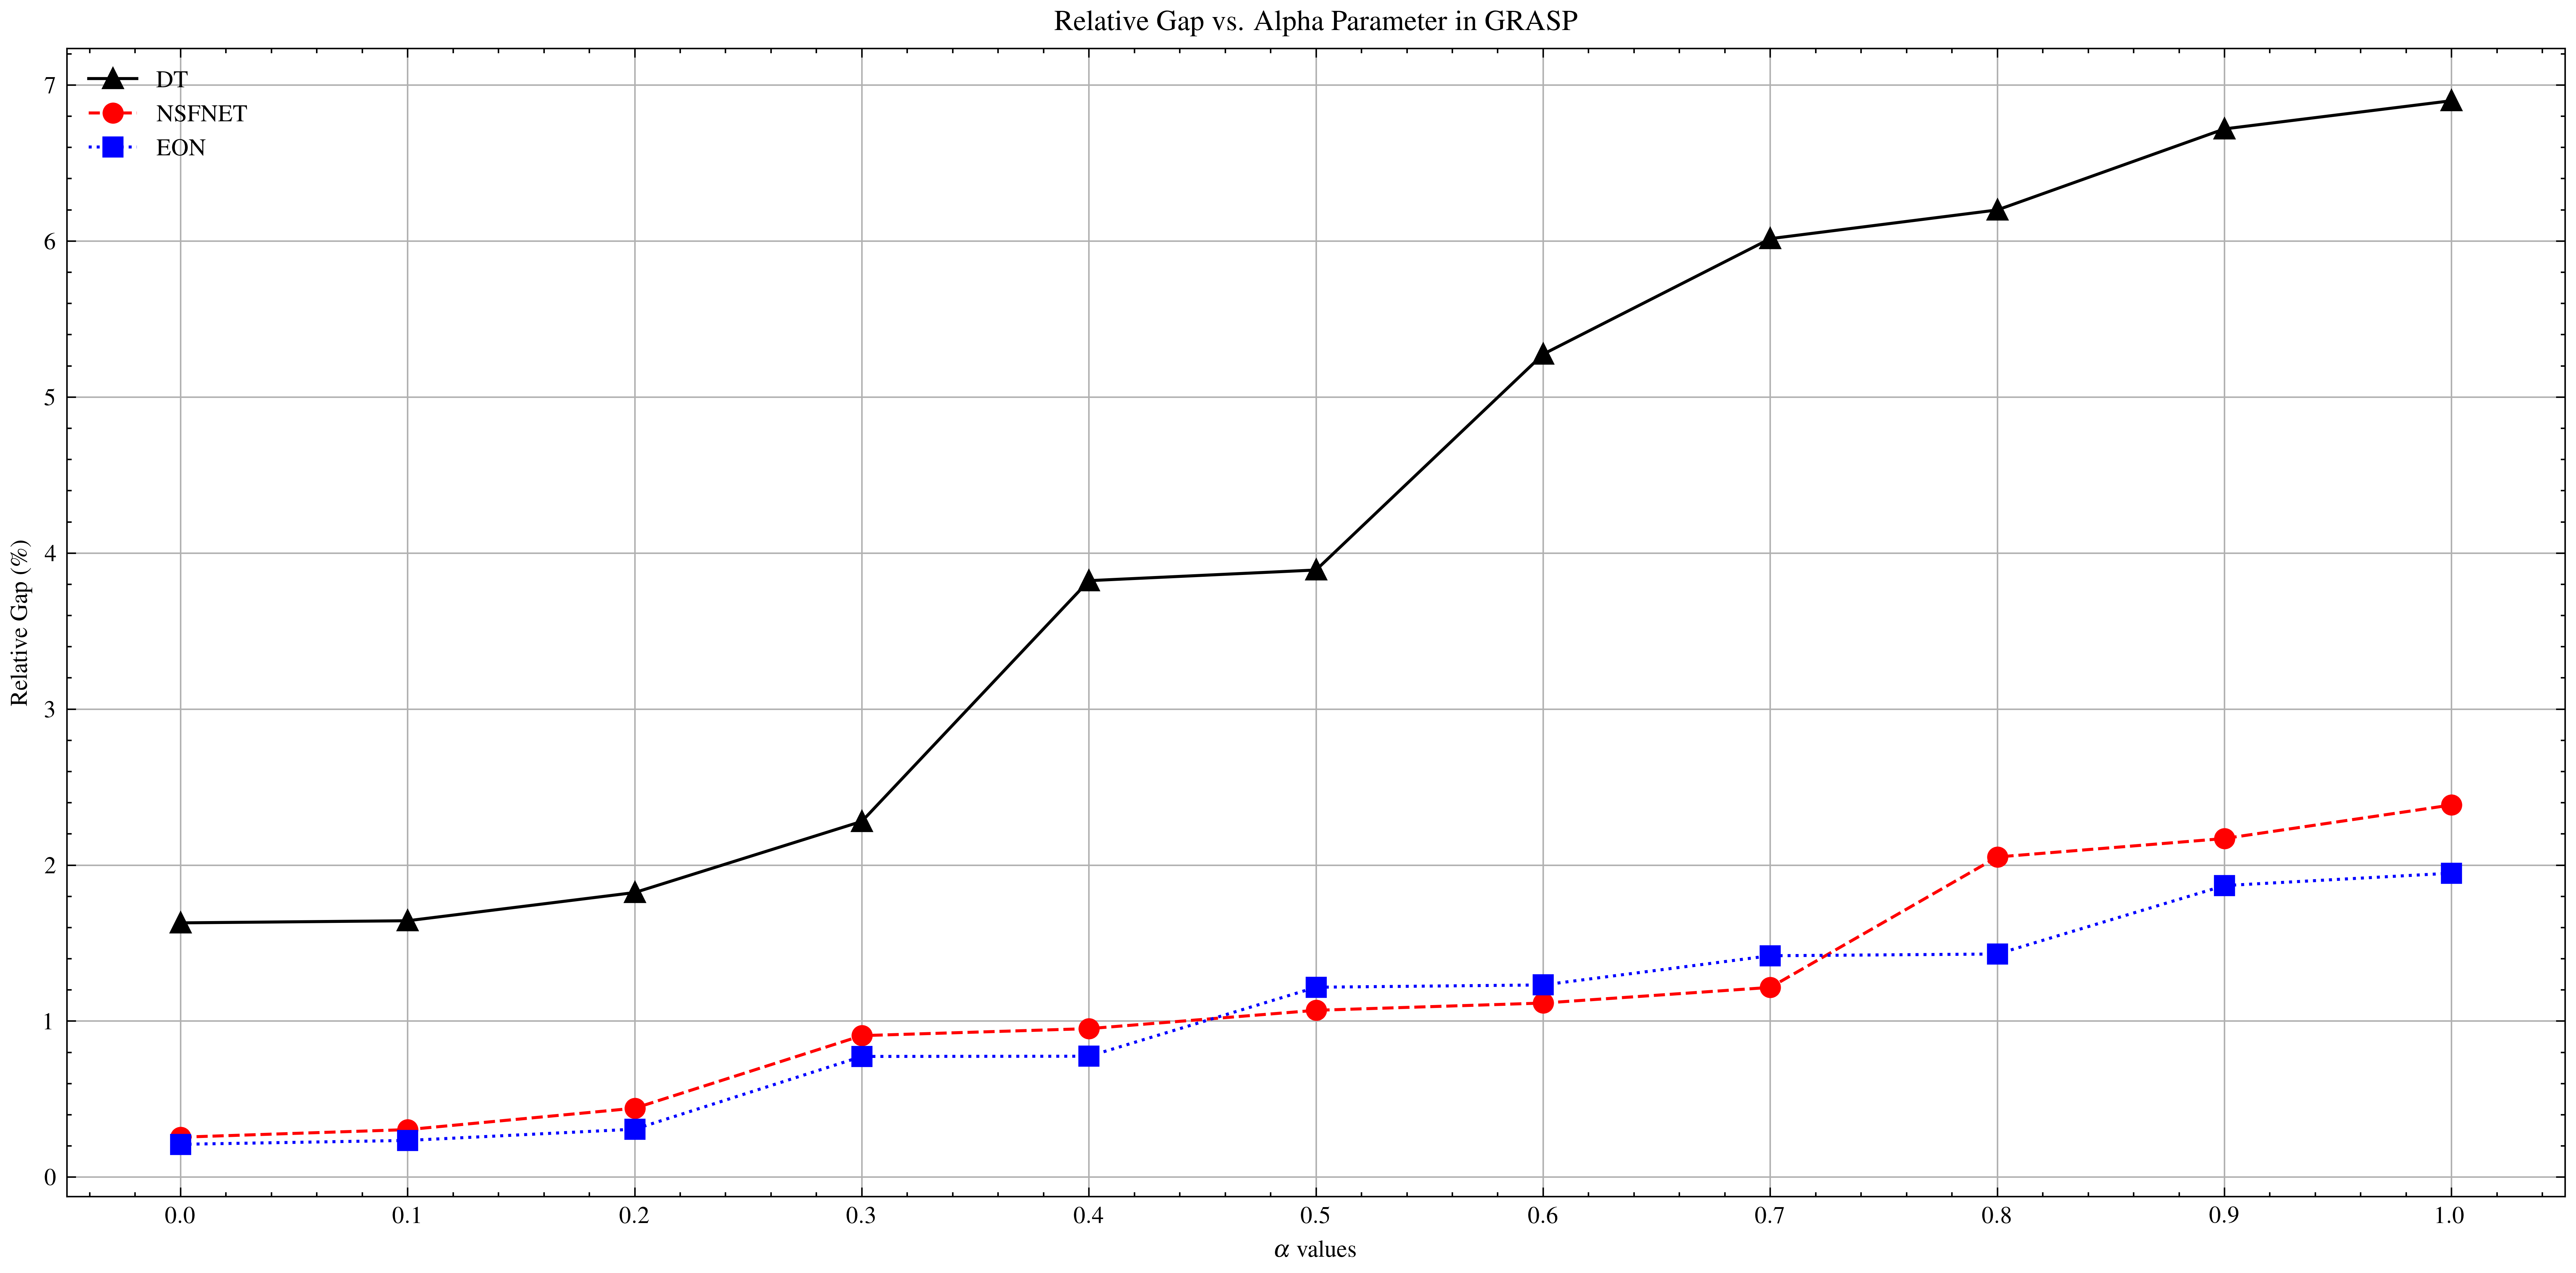

In [17]:
# Import necessary libraries

plt.style.use(['science', 'ieee'])

alpha_values = np.linspace(0, 1, 11)

relative_gap_DT = np.random.uniform(1, 8, len(alpha_values))  # Random data for DT network
relative_gap_NSFNET = np.random.uniform(0, 3, len(alpha_values))  # Random data for NSFNET network
relative_gap_EON = np.random.uniform(0, 2, len(alpha_values))  # Random data for EON network

# Sort the gaps for better visualization
relative_gap_DT.sort()
relative_gap_NSFNET.sort()
relative_gap_EON.sort()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(alpha_values, relative_gap_DT, marker='^', label='DT')
plt.plot(alpha_values, relative_gap_NSFNET, marker='o', label='NSFNET')
plt.plot(alpha_values, relative_gap_EON, marker='s', label='EON')

# Add labels, title, and legend
plt.xlabel(r'$\alpha$ values')
plt.ylabel('Relative Gap (\%)')
plt.title('Relative Gap vs. Alpha Parameter in GRASP')
plt.legend(loc='upper left')
plt.xticks(np.arange(0, 1.1, 0.1))
# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()